# Asociation Rule

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan asosiatif antara suatu kombinasi item. Analisis asosiasi dikenal juga sebagai salah satu teknik data mining yang menjadi dasar dari salah satu teknik data mining lainnya. Secara khusus, salah satu tahap analisis asosiasi yang menarik perhatian banyak peneliti untuk menghasilkan algoritma yang efisien, yaitu analisis pola frekuensi tinggi (frequent pattern mining)

Association rule berguna untuk menemukan hubungan penting antar item dalam setiap transaksi, hubungan tersebut dapat menandakan kuat tidaknya suatu aturan dalam asosiasi, Tujuan association rule adalah untuk menemukan keteraturan dalam data. Association rule dapat digunakan untuk mengidentifikasi item-item produk yang mungkin dibeli secara bersamaan dengan produk lain, atau dilihat secara bersamaan saat mencari informasi mengenai produk tertentu. Dalam pencarian association rule, diperlukan suatu variabel ukuran kepercayaan 9 (interestingness measure) yang dapat ditentukan oleh user, untuk mengatur batasan sejauh mana dan sebanyak apa hasil output yang diinginkan oleh user.Data Mining adalah langkah analisis terhadap proses penemuan pengetahuan didalam basisdata atau knowledge discovery in databases yang disingkat KDD. Pengetahuan bisa berupa pola data atau relasi antar data yang valid (yang tidak diketahui sebelumnya). Data Mining merupakan gabungan sejumlah disiplin ilmu komputer yang didefinisikan sebagai proses penemuan pola-pola baru dari kumpulan-kumpulan data sangat besar, meliputi metode-metode yang merupakan irisan dari AI (artificial intelligence), machine learning, statistics, dan database systems

Bentuk umum dari association rule adalah Antecedent dan Consequent. Bila kita ambil contoh dalam sebuah transaksi pembelian barang di sebuah minimarket didapat bentuk association rule roti selai. Yang artinya bahwa pelanggan yang membeli roti ada kemungkinan pelanggan tersebut juga akan membeli selai, dimana tidak ada batasan dalam jumlah item-item pada bagian antecedent ataupun consequent dalam sebuah rule

Data Mining ditujukan untuk mengekstrak (mengambil intisari) pengetahuan dari sekumpulan data sehingga didapatkan struktur yang dapat dimengerti manusia serta meliputi basisdata dan managemen data, pemprosesan data, pertimbangan model dan inferensi, ukuran ketertarikan, pertimbangan kompleksitas, pasca pemprosesan terhadap struktur yang ditemukan, visualisasi, dan online updating

Association rule meliputi dua tahap : 
1. Mencari kombinasi yang paling sering terjadi dari suatu itemset. 
2. Mendefinisikan condition dan result (conditional association rule). 


Dalam menentukan suatu association rule, terdapat suatu interestingness measure (ukuran kepercayaan) yang didapatkan dari hasil pengolahan data dengan perhitungan tertentu. Umumnya ada tiga ukuran  yaitu:

Support: yaitu suatu ukuran yang menunjukkan seberapa besar tingkat dominasi suatu item/ itemset dari keseluruhan transaksi. Ukuran ini akan menentukan apakah suatu item/itemset layak untuk dicari confidence-nya (misal, dari seluruh transaksi yang ada, seberapa besar tingkat dominasi yang menunjukkan bahwa item A dan B dibeli bersamaan) dapat juga digunakan untuk mencari tingkat dominasi item tunggal. Secara umum dapat ditulis seperti persamaan berikut. 

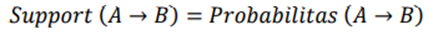

Confidence: yaitu suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (misal, seberapa sering item B dibeli jika orang membeli item A). Secara umum dapat ditulis seperti persamaan berikut. 
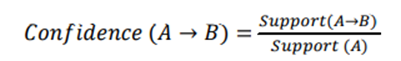

Improvement: yaitu suatu ukuran yang menunjukan besarnya kemungkinan dua item dapat dibeli secara bersamaan. Lebih jelasnya dapat dilihat pada persamaan

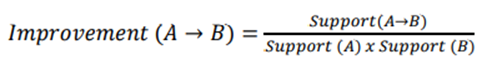

# 

Di sini saya akan mencoba menampilkan produk paling laris, bagaimana kinerja toko roti, mengekstraksi frequent itemset menggunakan algoritma apriori dan mempresentasikan asosiasinya menggunakan NetworkX.

saya menemukan data set  ' BreadBasket_DMS.csv ' yaitu data set yang berisi tentang penjualan sebuah Bakery Business , didalam data set tersebut berisi tanggal , waktu ,  jumlah transaksi dan produk 


#  Association Rules : Market Basket Analysis

dalam Association Rules, Market Basket Analysis digunakan untuk memprediksi kemungkinan produk yang dibeli bersama-sama. Association Rules menghitung frekuensi item yang terjadi bersama-sama, mencari asosiasi yang terjadi jauh lebih sering daripada yang diharapkan.

## 1) Disini kita perlu menginstal liblary phyton MLxtend . MLxtend adalah library python yang mengimplementasikan berbagai algoritma inti dan utilitas untuk pembelajaran mesin dan penggalian data

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## 2) setelah itu import Liblary yang dibutuhkan

In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

## 3) lalu Load data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/YohanWijaya10/Data-Mining-week-9/main/BreadBasket_DMS.csv')
data.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

## 4) lalu kita lakukan shape yang berfungsi untuk mengetahui dimensi dari dataframe atau ukuran baris dan kolomnya

In [4]:
data.shape

(21293, 4)

## 5) lalu kita lakukan describe Fungsi describe digunakan untuk menampilkan statistik deskriptif dari data frame atau series. Output dari fungsi ini berisi rangkuman central tendency dan sebaran dari dataset.

In [5]:
data.describe()

Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000

## 6) lalu kita cek informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya dengan cara .info()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


## 7) Lalu kita check apakah ada data yang none 

In [7]:
data.loc[data['Item']=='NONE',:].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

## 8) lalu drop data none 

In [8]:
data=data.drop(data.loc[data['Item']=='NONE'].index)

## 9) Lalu check ada berapa data yang unik

In [9]:
data['Item'].nunique()

94

## 10) lalu kita hitung data dari setiap item dihitung dari 10 data item terbesar

In [10]:
data['Item'].value_counts().sort_values(ascending=False).head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

## 11) lalu kita melakukan data visualisasi dengan 10 penjualan terbanyak dari setiap item menggunakan bar chart  

Text(0.5, 1.0, 'Best sellers')

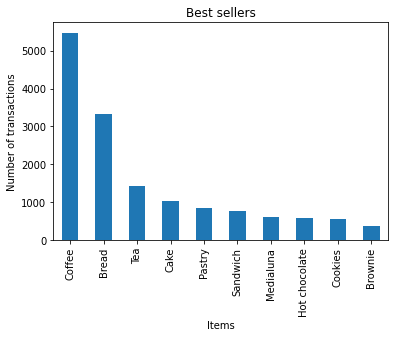

In [11]:
fig, ax=plt.subplots(figsize=(6,4))
data['Item'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

Disini kita bisa lihat Penjualan paling banyak terdapat pada penjualan Coffee dan Bread , jadi bisa disimpulkan kemunkinan orang membeli roti dan kopi bersamaan

## 12) lalu kita membuat function yang berisi set waktu mulai dari pagi , siang , sore dan malam dengan cara loc time dari jam jam sesuai dengan sesi

In [12]:
data.loc[(data['Time']<'12:00:00'),'Daytime']='Morning'
data.loc[(data['Time']>='12:00:00')&(data['Time']<'17:00:00'),'Daytime']='Afternoon'
data.loc[(data['Time']>='17:00:00')&(data['Time']<'21:00:00'),'Daytime']='Evening'
data.loc[(data['Time']>='21:00:00')&(data['Time']<'23:50:00'),'Daytime']='Night'

## 13) lalu kita bisa memvisualisasikan data tersebut menggunakan bar chart

Text(0.5, 1.0, 'Business during the day')

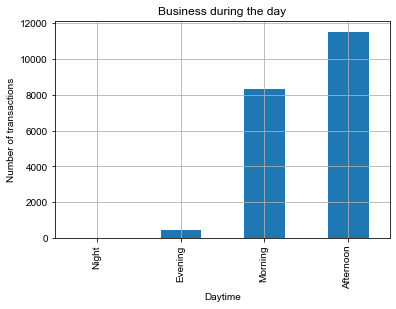

In [13]:
fig, ax=plt.subplots(figsize=(6,4))
sns.set_style('darkgrid')
data.groupby('Daytime')['Item'].count().sort_values().plot(kind='bar')
plt.ylabel('Number of transactions')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Business during the day')

Disini kita bisa lihat Penjualan paling banyak terdapat pada siang hari dan pagi hari lebih tinggi dari pada malam dan sore , dapat disimpulkan penjualan pada pagi dan siang bisa tinggi karena siang dan pagi adalah waktu aktiv untuk orang bekerja

## 14) lalu disi kita modifikasi data setnya 

In [14]:
#menggabungkan date dan time 
data['Date_Time']=pd.to_datetime(data['Date']+' '+data['Time'])

#membuat colummn baru daytime yang berisi waktu waktu mulai dari moring sampai night
data['Day']=data['Date_Time'].dt.day_name()

#membuat colummn baru Month yang berisi date bulan dengan format angka  
data['Month']=data['Date_Time'].dt.month

#membuat colummn baru Month_name yang berisi date bulan dengan format name 
data['Month_name']=data['Date_Time'].dt.month_name()

#membuat colummn baru Year yang berisi date tahun
data['Year']=data['Date_Time'].dt.year

#membuat colummn baru yang berisi gabungan dari  Year dan month_date 
data['Year_Month']=data['Year'].apply(str)+' '+data['Month_name'].apply(str)

#mengdrop colummn  date dan time 
data.drop(['Date','Time'], axis=1, inplace=True)

#mengset Date_time jadi index colummn
data.index=data['Date_Time']

#mengubah nama index colummn
data.index.name='Date'
databaru = data
data.head()

Transaction           Item  Daytime           Date_Time  \
Date                                                                           
2016-10-30 09:58:11            1          Bread  Morning 2016-10-30 09:58:11   
2016-10-30 10:05:34            2   Scandinavian  Morning 2016-10-30 10:05:34   
2016-10-30 10:05:34            2   Scandinavian  Morning 2016-10-30 10:05:34   
2016-10-30 10:07:57            3  Hot chocolate  Morning 2016-10-30 10:07:57   
2016-10-30 10:07:57            3            Jam  Morning 2016-10-30 10:07:57   

                        Day  Month Month_name  Year    Year_Month  
Date                                                               
2016-10-30 09:58:11  Sunday     10    October  2016  2016 October  
2016-10-30 10:05:34  Sunday     10    October  2016  2016 October  
2016-10-30 10:05:34  Sunday     10    October  2016  2016 October  
2016-10-30 10:07:57  Sunday     10    October  2016  2016 October  
2016-10-30 10:07:57  Sunday     10    October  2016  2016 October

## 15) dengan data yang sudah kita buat bisa membuat visualissasi data penjulanan produk setiap bulan menggunakan bar chart

Text(0.5, 1.0, 'Business during the past months')

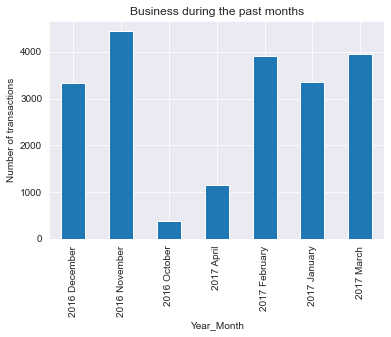

In [15]:
data.groupby('Year_Month')['Item'].count().plot(kind='bar')
plt.ylabel('Number of transactions')
plt.title('Business during the past months')

Disini kita bisa melihat performa penjualan toko setiap bulanya , jadi dengan adanya visualisasi ini kita dapat meningkatkan peforma penjualan toko , jika dihubungkan dengan assosiation rule pada hasil chart tersebut penjualan awal bulan , akhir bulan dan tengah bulan meiliki perbedaan . pada awal bulan dan akhir bulan transaksinya lebih tinggi dari pada pertengahan bulan . jika disimpulan ini memiliki keterkaitan antara penjualan dengan event tahun baruan 

## 16) Disini  kita bisa melihat penjualan setiap item berdasarkan bulan , selain itu disini kita juga bisa melihat item yang best seler yang mana ditabel tersebut 


In [16]:
data2=data.pivot_table(index='Month_name',columns='Item', aggfunc={'Item':'count'}).fillna(0)
data2['Max']=data2.idxmax(axis=1)
data2

Item                                                     \
Item       Adjustment Afternoon with the baker Alfajores Argentina Night   
Month_name                                                                 
April             0.0                      2.0      24.0             5.0   
December          0.0                      0.0      45.0             0.0   
February          0.0                     13.0     112.0             0.0   
January           0.0                     15.0      39.0             0.0   
March             0.0                     14.0       8.0             2.0   
November          1.0                      0.0     141.0             0.0   
October           0.0                      0.0       0.0             0.0   

                                                                 ...  \
Item       Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ...   
Month_name                                                       ...   
April           1.0   0.0     11.0      0.0          0.0    0.0  ...   
December        6.0   0.0      0.0      8.0          3.0    0.0  ...   
February        5.0   0.0     60.0      1.0          2.0    0.0  ...   
January         5.0   0.0     20.0     10.0          0.0    0.0  ...   
March           3.0   0.0     61.0     19.0          0.0    0.0  ...   
November       18.0   1.0      0.0     10.0          0.0    4.0  ...   
October         0.0   0.0      0.0      0.0          0.0    2.0  ...   

                                                                    \
Item       The Nomad Tiffin Toast Truffles Tshirt Valentine's card   
Month_name                                                           
April            8.0   20.0  22.0     22.0    0.0              0.0   
December        10.0    0.0  65.0     27.0    0.0              0.0   
February        12.0   26.0  72.0     37.0   21.0             12.0   
January         15.0   36.0  79.0     30.0    0.0              1.0   
March           10.0   57.0  80.0     48.0    0.0              0.0   
November         3.0    7.0   0.0     29.0    0.0              0.0   
October          0.0    0.0   0.0      0.0    0.0              0.0   

                                                                   Max  
Item       Vegan Feast Vegan mincepie Victorian Sponge                  
Month_name                                                              
April              7.0            0.0              0.0  (Item, Coffee)  
December           0.0           33.0              0.0  (Item, Coffee)  
February           3.0            5.0              0.0  (Item, Coffee)  
January            0.0           13.0              0.0  (Item, Coffee)  
March              6.0            3.0              0.0  (Item, Coffee)  
November           0.0            0.0              4.0  (Item, Coffee)  
October            0.0            0.0              3.0  (Item, Coffee)  

[7 rows x 95 columns]

## 17) Disini kita bisa melihat penjualan setiap item berdasarkan daytime , selain itu disini kita juga bisa melihat item yang best seler yang mana ditabel tersebut

In [17]:
data3=data.pivot_table(index='Daytime',columns='Item', aggfunc={'Item':'count'}).fillna(0)
data3['Max']=data3.idxmax(axis=1)
data3

Item                                                     \
Item      Adjustment Afternoon with the baker Alfajores Argentina Night   
Daytime                                                                   
Afternoon        0.0                     19.0     245.0             3.0   
Evening          1.0                     15.0      17.0             0.0   
Morning          0.0                     10.0     107.0             4.0   
Night            0.0                      0.0       0.0             0.0   

                                                                ...            \
Item      Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ... The Nomad   
Daytime                                                         ...             
Afternoon     31.0   1.0     67.0     30.0          4.0    0.0  ...      31.0   
Evening        2.0   0.0      1.0      0.0          1.0    0.0  ...       1.0   
Morning        5.0   0.0     84.0     18.0          0.0    6.0  ...      26.0   
Night          0.0   0.0      0.0      0.0          0.0    0.0  ...       0.0   

                                                                      \
Item      Tiffin  Toast Truffles Tshirt Valentine's card Vegan Feast   
Daytime                                                                
Afternoon   93.0  114.0    152.0    0.0              4.0         4.0   
Evening      4.0    0.0      7.0   21.0              4.0         3.0   
Morning     49.0  204.0     34.0    0.0              3.0         2.0   
Night        0.0    0.0      0.0    0.0              2.0         7.0   

                                                           Max  
Item      Vegan mincepie Victorian Sponge                       
Daytime                                                         
Afternoon           30.0              5.0       (Item, Coffee)  
Evening              2.0              0.0       (Item, Coffee)  
Morning             22.0              2.0       (Item, Coffee)  
Night                0.0              0.0  (Item, Vegan Feast)  

[4 rows x 95 columns]

## 18) Disini kita bisa melihat penjualan setiap item berdasarkan hari , selain itu disini kita juga bisa melihat item yang best seler yang mana ditabel tersebut

In [18]:
data4=data.pivot_table(index='Day',columns='Item', aggfunc={'Item':'count'}).fillna(0)
data4['Max']=data4.idxmax(axis=1)
data4

Item                                                     \
Item      Adjustment Afternoon with the baker Alfajores Argentina Night   
Day                                                                       
Friday           0.0                      7.0      59.0             0.0   
Monday           0.0                      5.0      32.0             0.0   
Saturday         0.0                     12.0      67.0             5.0   
Sunday           0.0                     14.0      70.0             1.0   
Thursday         0.0                      2.0      57.0             1.0   
Tuesday          0.0                      2.0      43.0             0.0   
Wednesday        1.0                      2.0      41.0             0.0   

                                                                ...            \
Item      Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ... The Nomad   
Day                                                             ...             
Friday         4.0   0.0     21.0      3.0          0.0    0.0  ...       6.0   
Monday         2.0   0.0     10.0      8.0          0.0    0.0  ...       5.0   
Saturday       5.0   0.0     33.0      8.0          0.0    3.0  ...      24.0   
Sunday         7.0   1.0     21.0     11.0          0.0    3.0  ...      15.0   
Thursday       8.0   0.0     21.0      3.0          4.0    0.0  ...       3.0   
Tuesday        6.0   0.0     23.0     13.0          0.0    0.0  ...       2.0   
Wednesday      6.0   0.0     23.0      2.0          1.0    0.0  ...       3.0   

                                                                     \
Item      Tiffin Toast Truffles Tshirt Valentine's card Vegan Feast   
Day                                                                   
Friday      37.0  63.0     33.0    0.0              1.0         1.0   
Monday       3.0  38.0     29.0    0.0              0.0         0.0   
Saturday    35.0  53.0     46.0   21.0              7.0        10.0   
Sunday      28.0  36.0     23.0    0.0              0.0         2.0   
Thursday    25.0  53.0     23.0    0.0              3.0         0.0   
Tuesday      5.0  40.0     19.0    0.0              2.0         2.0   
Wednesday   13.0  35.0     20.0    0.0              0.0         1.0   

                                                      Max  
Item      Vegan mincepie Victorian Sponge                  
Day                                                        
Friday               9.0              0.0  (Item, Coffee)  
Monday               5.0              0.0  (Item, Coffee)  
Saturday            11.0              1.0  (Item, Coffee)  
Sunday               9.0              4.0  (Item, Coffee)  
Thursday             7.0              0.0  (Item, Coffee)  
Tuesday              8.0              1.0  (Item, Coffee)  
Wednesday            5.0              1.0  (Item, Coffee)  

[7 rows x 95 columns]

## 19) disini kita bisa melakukan visualisasi data penjualan seluruh item  berdasarkan Timeframe Bulanan menggunakan line chart 

Text(0.5, 1.0, 'Business during the past months')

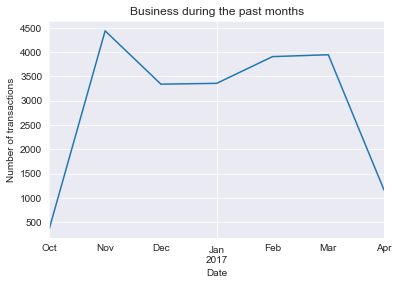

In [19]:
data['Item'].resample('M').count().plot()
plt.ylabel('Number of transactions')
plt.title('Business during the past months')

## 20) Disini kita bisa melakukan visualisasi data penjualan seluruh item berdasarkan Timeframe Mingguan menggunakan line chart

Text(0.5, 1.0, 'Weekly business during the past months')

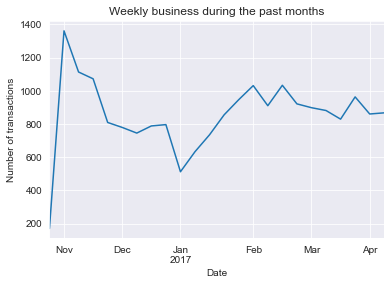

In [20]:
data['Item'].resample('W').count().plot()
plt.ylabel('Number of transactions')
plt.title('Weekly business during the past months')

## 21) Disini kita bisa melakukan visualisasi data penjualan seluruh item berdasarkan Timeframe Harian menggunakan line chart

Text(0.5, 1.0, 'Daily business during the past months')

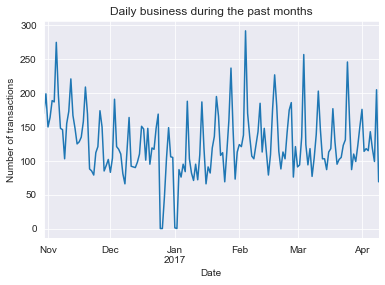

In [21]:
data['Item'].resample('D').count().plot()
plt.ylabel('Number of transactions')
plt.title('Daily business during the past months')

## 22) Disini kita bisa melihat penjualan paling sedikit berdasarkan  timeframe harian

In [22]:
data['Item'].resample('D').count().min()
print("penjualan Paling sedikit : " ,data['Item'].resample('D').count().min())

penjualan Paling sedikit :  0


## 23) Disini kita bisa melihat penjualan paling banyak berdasarkan  timeframe harian

In [23]:
print("penjualan Paling Banyak : " ,data['Item'].resample('D').count().max())

penjualan Paling Banyak :  292


# Association Rule : Algoritma Apiori

Algoritma Apriori adalah salah satu algoritma pada data mining untuk mencari frequent item/itemset pada transaksional database. Algoritma apriori pertama kali diperkenalkan oleh R.Agarwal dan R Srikant untuk mencari frequent tertinggi dari suatu database. 

Algoritma apriori banyak digunakan pada data transaksi atau biasa disebut market basket, misalkan toko roti memiliki market basket,  dengan adanya algoritma apriori, pemilik toko roti dapat mengetahui pola pembelian seorang konsumen. 

cara kerja Algoritma Apiori :

    Menentukan minimum support

    Iterasi 1 : hitung item-item dari support(transaksi yang memuat seluruh item) dengan men-scan database untuk 1-itemset, setelah 1-itemset didapatkan, dari 1-itemset apakah diatas minimum support, apabila telah memenuhi minimum support, 1-itemset tersebut akan menjadi pola frequent tinggi,

    Iterasi 2 : untuk mendapatkan 2-itemset, harus dilakukan kombinasi dari k-itemset sebelumnya, kemudian scan database lagi untuk hitung item-item yang memuat support. itemset yang memenuhi minimum support akan dipilih sebagai pola frequent tinggi dari kandidat

    Tetapkan nilai k-itemset dari support yang telah memenuhi minimum support dari k-itemset

    lakukan proses untuk iterasi selanjutnya hingga tidak ada lagi k-itemset yang memenuhi minimum support.

## 1) membuat dataset yang berisi daftar Item yang dibeli bersamaan

In [24]:
lst=[]
for item in data['Transaction'].unique():
    lst2=list(set(data[data['Transaction']==item]['Item']))
    if len(lst2)>0:
        lst.append(lst2)
print(lst[0:3])
print(len(lst))

[['Bread'], ['Scandinavian'], ['Cookies', 'Hot chocolate', 'Jam']]
9465


## 1) Untuk algoritm Apriori, kumpulan data ini perlu diencoding satu kali. Ini dilakukan dengan menggunakan TransactionEncoder seperti yang ditunjukkan di sini, diikuti oleh algoritm apriori untuk mendapatkan frequent itemset. Kemudian fungsi assosiation rule digunakan yang dapat mengambil metrik apa pun. Di sini  telah menggunakan 'alift' dan menentukan ambang minimum sebagai 1.

In [25]:
te=TransactionEncoder()
te_data=te.fit(lst).transform(lst)
data_x=pd.DataFrame(te_data,columns=te.columns_)
print(data_x.head())

frequent_items= apriori(data_x, use_colnames=True, min_support=0.03)
print(frequent_items.head())

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

   Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   
1       False                     False      False            False     False   
2       False                     False      False            False     False   
3       False                     False      False            False     False   
4       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   
1  False     False     False         False   False  ...     False      False   
2  False     False     False         False   False  ...     False      False   
3  False     False     False         False   False  ...     False      False   
4  False     False     False         False   False  ...     False      False   

   Tiffin  Toast  Truffles  Tshi

antecedents consequents  antecedent support  consequent support   support  \
0      Coffee        Cake            0.478394            0.103856  0.054728   
1        Cake      Coffee            0.103856            0.478394  0.054728   
2   Medialuna      Coffee            0.061807            0.478394  0.035182   
3      Coffee   Medialuna            0.478394            0.061807  0.035182   
4      Pastry      Coffee            0.086107            0.478394  0.047544   
5      Coffee      Pastry            0.478394            0.086107  0.047544   
6    Sandwich      Coffee            0.071844            0.478394  0.038246   
7      Coffee    Sandwich            0.478394            0.071844  0.038246   

   confidence      lift  leverage  conviction  
0    0.114399  1.101515  0.005044    1.011905  
1    0.526958  1.101515  0.005044    1.102664  
2    0.569231  1.189878  0.005614    1.210871  
3    0.073542  1.189878  0.005614    1.012667  
4    0.552147  1.154168  0.006351    1.164682  
5    0.099382  1.154168  0.006351    1.014740  
6    0.532353  1.112792  0.003877    1.115384  
7    0.079947  1.112792  0.003877    1.008807

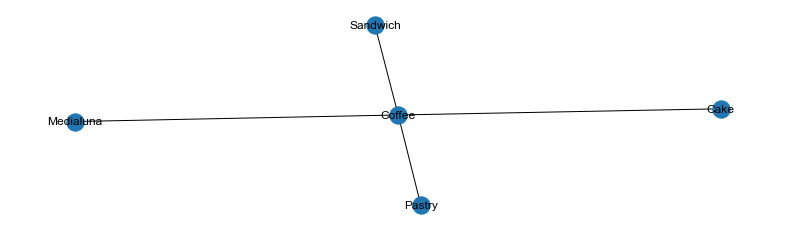

In [26]:
fig, ax=plt.subplots( figsize=(14,4) )

GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

pada hasil tersebut kita bisa lihat rata rata orang yang membeli medialuna bersamaan dengan kopi ,cake bersamaan dengan kopi , pastry bersamaan dengan kopi, sandwich bersamaan dengan kopi

# Referensi

Mohamad Fauzy, (2015), Bandung, Penerapan Metode Association Rule Menggunakan Algoritma Apriori pada Simulasi Prediksi Hujan Wilayah Kota Bandung, Fakultas Informatika Telkom University https://core.ac.uk/download/pdf/299905763.pdf

Sulman Sarwar, (2018), Transactions from a bakery, Kaggle, https://www.kaggle.com/datasets/sulmansarwar/transactions-from-a-bakery

bbhatt001, (2018), business-model-association-rules, https://www.kaggle.com/code/bbhatt001/bakery-business-model-association-rules

Amir, (2017), Data Mining Dengan Algoritma Apriori untuk Penentuan Aturan Asosiasi Pola Pembelian Pupuk https://ejournal.bsi.ac.id/ejurnal/index.php/paradigma/article/view/1836

Ejournal bsi , ASSOCIATION RULE (ALGORITMA A PRIORI) https://ejournal.bsi.ac.id/ejurnal/index.php/paradigma/article/download/1836/1409

Umm, eprints.umm.ac.id, BAB II LANDASAN TEORI, https://eprints.umm.ac.id/63754/38/BAB%20II.pdf

Novrina, ASSOCIATION RULE (ALGORITMA A PRIORI) ,http://novrina.staff.gunadarma.ac.id/Downloads/files/21100/Association+Rule.pdf

Yohanwijaya,(2022) , data mining week 9, Github, https://raw.githubusercontent.com/YohanWijaya10/Data-Mining-week-9/main/BreadBasket_DMS.csv

Belajar Data Science di Rumah,(2022) , Kenali Data Science Algoritma Apriori pada Machine Learning, dqlab.id https://dqlab.id/kenali-data-science-algoritma-apriori-pada-machine-learning

Rintho rante rerung,(2018) Penerapan Data Mining dengan Memanfaatkan Metode Association Rule untuk Promosi Produk, neliti.com 
https://www.neliti.com/publications/259801/penerapan-data-mining-dengan-memanfaatkan-metode-association-rule-untuk-promosi

TechTarget Contributor, market basket analysis, TechTarget.com
https://www.techtarget.com/searchcustomerexperience/definition/market-basket-analysis#:~:text=In%20market%20basket%20analysis%2C%20association,far%20more%20often%20than%20expected
